# **PROJETO DE MODELO DE PREDIÇÃO DA INFLAÇÃO MENSAL PELO INDICE NACIONALDE PREÇOS AO CONSUMIDOR AMPLO (IPCA)**

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
%matplotlib inline

## **I - DATASET extraído do site do SIDRA-IBGE (IPCA) - *carregamento dos dados***:

> **IPCA mensal BR e setores- grupos e subgrupos**

* https://sidra.ibge.gov.br/tabela/7060
* https://sidra.ibge.gov.br/tabela/1420


In [2]:
df = pd.read_excel('tabela7060.xlsx')
df = df.T.reset_index(drop=True).drop([0,1,31,32], axis=1)
df = df.drop([0], axis=0)
df.rename(columns={2:'Competencia', 3:'IPCA', 4:'Alimentacao_Domicilio', 5:'Alimentacao_Fora', 6:'Habitacao_Encargos_Manutenção', 7:'Habitacao_Combustivel_Energia',
        8: 'Residencia_Moveis_Utensilios', 9: 'Residencia_Aparelhos_Eletronicos', 10:'Residencia_Consertos_Manutencao', 11:'Vestuario_Roupas',
        12:'Vestuario_Calcados', 13:'Vesturario_Joias_Biju', 14:'Vestuario_Tecidos', 15:'Transporte_Público', 16:'Veiculo_Proprio', 17:'Combustiveis_veiculos', 
        18: 'Produtos_Farmaceuticos', 19:'Produtos_Oticos', 20:'Serv_Medicos_e_Dentarios', 21:'Serv_Laboratoriais_e_Hosp', 22:'Plano_Saude',
        23:'Higiene_Pessoal', 24:'Serv_Pessoais', 25:'Recreacao', 26:'Cursos_Regul', 27:'Leitura', 28:'Papelaria', 29:'Cursos_Diversos', 30:'Comunicacao'}, inplace = True)
df=df.drop([1], axis=0)
#df[['Mes', 'Ano']]=df['Competencia'].str.split(' ',expand = True)
df['Competencia'] = df['Competencia'].str.replace(' ', '/')
df = df[['Competencia','Alimentacao_Domicilio', 'Alimentacao_Fora','Habitacao_Encargos_Manutenção', 'Habitacao_Combustivel_Energia',
       'Residencia_Moveis_Utensilios', 'Residencia_Aparelhos_Eletronicos', 'Residencia_Consertos_Manutencao', 'Vestuario_Roupas',
       'Vestuario_Calcados', 'Vesturario_Joias_Biju', 'Vestuario_Tecidos','Transporte_Público', 'Veiculo_Proprio', 'Combustiveis_veiculos',
       'Produtos_Farmaceuticos', 'Produtos_Oticos', 'Serv_Medicos_e_Dentarios','Serv_Laboratoriais_e_Hosp', 'Plano_Saude', 'Higiene_Pessoal',
       'Serv_Pessoais', 'Recreacao', 'Cursos_Regul', 'Leitura', 'Papelaria','Cursos_Diversos', 'Comunicacao', 'IPCA']]
df = df.reset_index(drop=True)
df.head()

,Competencia,Alimentacao_Domicilio,Alimentacao_Fora,Habitacao_Encargos_Manutenção,Habitacao_Combustivel_Energia,Residencia_Moveis_Utensilios,Residencia_Aparelhos_Eletronicos,Residencia_Consertos_Manutencao,Vestuario_Roupas,Vestuario_Calcados,...,Plano_Saude,Higiene_Pessoal,Serv_Pessoais,Recreacao,Cursos_Regul,Leitura,Papelaria,Cursos_Diversos,Comunicacao,IPCA
0,janeiro/2020,0.2,0.82,0.68,0.31,-0.19,0.02,0.15,-0.64,-0.26,...,0.6,-2.07,0.24,0.53,0,1.21,0.44,0.29,0.12,0.21
1,fevereiro/2020,0.06,0.22,0.12,-1.32,-0.1,-0.09,0.01,-0.98,-0.46,...,0.59,2.12,0.2,0.5,4.42,0.43,-0.77,2.67,0.21,0.25
2,março/2020,1.4,0.51,0.08,0.2,-0.62,-1.82,0.19,0.27,-0.22,...,0.6,0.46,0.13,-0.85,0.74,0.76,0.14,-0.27,0.04,0.07
3,abril/2020,2.24,0.76,0.15,-0.55,-1.52,-1.59,0.63,0.33,-0.69,...,0.6,0.14,0.19,-0.69,0,-0.15,0.09,0.07,-0.2,-0.31
4,maio/2020,0.33,0.04,0,-0.7,-1.85,3.21,0.86,-0.64,-0.74,...,0.6,0.05,0.12,-0.32,0,0.22,0.25,-0.06,0.24,-0.38


In [3]:
df.tail()

,Competencia,Alimentacao_Domicilio,Alimentacao_Fora,Habitacao_Encargos_Manutenção,Habitacao_Combustivel_Energia,Residencia_Moveis_Utensilios,Residencia_Aparelhos_Eletronicos,Residencia_Consertos_Manutencao,Vestuario_Roupas,Vestuario_Calcados,...,Plano_Saude,Higiene_Pessoal,Serv_Pessoais,Recreacao,Cursos_Regul,Leitura,Papelaria,Cursos_Diversos,Comunicacao,IPCA
45,outubro/2023,0.27,0.42,0.23,-0.37,0.29,0.58,0.79,0.44,0.59,...,0.76,0.09,0.38,0.11,0,0.12,0.35,0.21,-0.19,0.24
46,novembro/2023,0.75,0.32,0.35,0.71,-0.63,-0.55,1.38,-0.33,-0.27,...,0.76,-0.95,0.41,0.86,0,-0.03,0.14,0.1,-0.5,0.28
47,dezembro/2023,1.34,0.53,0.34,0.35,0.24,1.36,0.75,0.64,0.85,...,0.76,0.19,0.58,0.32,0,2.11,0.5,0.31,0.04,0.56
48,janeiro/2024,1.81,0.25,0.59,-0.37,-0.15,0.64,0.29,-0.11,0.73,...,0.76,0.94,1.04,0.49,0,3,0.4,0.3,-0.08,0.42
49,fevereiro/2024,1.12,0.49,0.34,0.15,0.12,-0.37,0.31,-0.56,-0.14,...,0.76,0.54,0.67,-0.92,6.13,0.7,0.21,2.46,1.56,0.83


In [4]:
df.Competencia.values

array(['janeiro/2020', 'fevereiro/2020', 'março/2020', 'abril/2020',
       'maio/2020', 'junho/2020', 'julho/2020', 'agosto/2020',
       'setembro/2020', 'outubro/2020', 'novembro/2020', 'dezembro/2020',
       'janeiro/2021', 'fevereiro/2021', 'março/2021', 'abril/2021',
       'maio/2021', 'junho/2021', 'julho/2021', 'agosto/2021',
       'setembro/2021', 'outubro/2021', 'novembro/2021', 'dezembro/2021',
       'janeiro/2022', 'fevereiro/2022', 'março/2022', 'abril/2022',
       'maio/2022', 'junho/2022', 'julho/2022', 'agosto/2022',
       'setembro/2022', 'outubro/2022', 'novembro/2022', 'dezembro/2022',
       'janeiro/2023', 'fevereiro/2023', 'março/2023', 'abril/2023',
       'maio/2023', 'junho/2023', 'julho/2023', 'agosto/2023',
       'setembro/2023', 'outubro/2023', 'novembro/2023', 'dezembro/2023',
       'janeiro/2024', 'fevereiro/2024'], dtype=object)

In [5]:
df1=pd.read_excel('tabela1420_1.xlsx')
df1 = df1.drop([0], axis=0)
df1.rename(columns={'Unnamed: 0':'Competencia', 'Unnamed: 1':'IPCA', 'Unnamed: 2':'Alimentacao_Domicilio', 'Unnamed: 3':'Alimentacao_Fora', 
                    'Unnamed: 4':'Habitacao_Encargos_Manutenção', 'Unnamed: 5':'Habitacao_Combustivel_Energia','Unnamed: 6': 'Residencia_Moveis_Utensilios',
                    'Unnamed: 7': 'Residencia_Aparelhos_Eletronicos', 'Unnamed: 8':'Residencia_Consertos_Manutencao', 'Unnamed: 9':'Vestuario_Roupas',
                    'Unnamed: 10':'Vestuario_Calcados', 'Unnamed: 11':'Vesturario_Joias_Biju', 'Unnamed: 12':'Vestuario_Tecidos','Unnamed: 13':'Transporte_Público', 
                    'Unnamed: 14':'Veiculo_Proprio', 'Unnamed: 15':'Combustiveis_veiculos', 'Unnamed: 16': 'Produtos_Farmaceuticos', 'Unnamed: 17':'Produtos_Oticos',
                    'Unnamed: 18':'Serv_Medicos_e_Dentarios', 'Unnamed: 19':'Serv_Laboratoriais_e_Hosp', 'Unnamed: 20':'Plano_Saude','Unnamed: 21':'Higiene_Pessoal',
                    'Unnamed: 22':'Serv_Pessoais', 'Unnamed: 23':'Recreacao', 'Unnamed: 24':'Cursos_Regul', 'Unnamed: 25':'Leitura', 'Unnamed: 26':'Papelaria',
                    'Unnamed: 27':'Cursos_Diversos', 'Unnamed: 28':'Comunicacao'}, inplace = True)
df1['Competencia'] = df1['Competencia'].str.replace(' ','/')
df1 = df1[['Competencia','Alimentacao_Domicilio', 'Alimentacao_Fora','Habitacao_Encargos_Manutenção', 'Habitacao_Combustivel_Energia',
       'Residencia_Moveis_Utensilios', 'Residencia_Aparelhos_Eletronicos', 'Residencia_Consertos_Manutencao', 'Vestuario_Roupas',
       'Vestuario_Calcados', 'Vesturario_Joias_Biju', 'Vestuario_Tecidos','Transporte_Público', 'Veiculo_Proprio', 'Combustiveis_veiculos',
       'Produtos_Farmaceuticos', 'Produtos_Oticos', 'Serv_Medicos_e_Dentarios','Serv_Laboratoriais_e_Hosp', 'Plano_Saude', 'Higiene_Pessoal',
       'Serv_Pessoais', 'Recreacao', 'Cursos_Regul', 'Leitura', 'Papelaria','Cursos_Diversos', 'Comunicacao', 'IPCA']]
df1 = df1.drop([1], axis =0)
df1 = df1.reset_index(drop=True)
df1.head()

,Competencia,Alimentacao_Domicilio,Alimentacao_Fora,Habitacao_Encargos_Manutenção,Habitacao_Combustivel_Energia,Residencia_Moveis_Utensilios,Residencia_Aparelhos_Eletronicos,Residencia_Consertos_Manutencao,Vestuario_Roupas,Vestuario_Calcados,...,Plano_Saude,Higiene_Pessoal,Serv_Pessoais,Recreacao,Cursos_Regul,Leitura,Papelaria,Cursos_Diversos,Comunicacao,IPCA
0,janeiro/2017,-0.37,0.69,0.36,-0.28,0.03,-0.34,0.19,-0.41,-0.42,...,1.07,0.1,0.33,0.65,0,2.27,0.39,0,0.63,0.29
1,fevereiro/2017,-0.68,0.11,0.32,0.04,0.51,-0.21,0.02,-0.36,0.23,...,1.07,0.74,0.48,0.04,6.99,0.44,0.39,3.04,0.66,0.34
2,março/2017,-0.02,0.41,0.17,3.52,-0.16,-0.5,-0.11,-0.13,-0.06,...,1.07,0.71,0.5,0.57,1.19,0.16,1.27,0.45,-0.63,0.2
3,abril/2017,0.52,0.38,0.22,-4.05,-0.21,-0.57,0.66,0.44,0.7,...,1.07,0.07,0.31,-0.27,0.01,0.23,-0.01,0,0.55,0.11
4,maio/2017,-0.26,0.06,0.36,6.31,-0.22,-0.28,-0.04,1.09,0.85,...,1.06,0.05,0.39,-0.02,0,0.04,1.1,0,0.09,0.37


In [6]:
df1.Competencia.values

array(['janeiro/2017', 'fevereiro/2017', 'março/2017', 'abril/2017',
       'maio/2017', 'junho/2017', 'julho/2017', 'agosto/2017',
       'setembro/2017', 'outubro/2017', 'novembro/2017', 'dezembro/2017',
       'janeiro/2018', 'fevereiro/2018', 'março/2018', 'abril/2018',
       'maio/2018', 'junho/2018', 'julho/2018', 'agosto/2018',
       'setembro/2018', 'outubro/2018', 'novembro/2018', 'dezembro/2018',
       'janeiro/2019', 'fevereiro/2019', 'março/2019', 'abril/2019',
       'maio/2019', 'junho/2019', 'julho/2019', 'agosto/2019',
       'setembro/2019', 'outubro/2019', 'novembro/2019', 'dezembro/2019'],
      dtype=object)

In [7]:
df1.shape

(36, 29)

In [8]:
df.shape

(50, 29)

In [9]:
df3 = pd.concat([df1,df], axis = 0, ignore_index=True)
df3.head()


,Competencia,Alimentacao_Domicilio,Alimentacao_Fora,Habitacao_Encargos_Manutenção,Habitacao_Combustivel_Energia,Residencia_Moveis_Utensilios,Residencia_Aparelhos_Eletronicos,Residencia_Consertos_Manutencao,Vestuario_Roupas,Vestuario_Calcados,...,Plano_Saude,Higiene_Pessoal,Serv_Pessoais,Recreacao,Cursos_Regul,Leitura,Papelaria,Cursos_Diversos,Comunicacao,IPCA
0,janeiro/2017,-0.37,0.69,0.36,-0.28,0.03,-0.34,0.19,-0.41,-0.42,...,1.07,0.1,0.33,0.65,0,2.27,0.39,0,0.63,0.29
1,fevereiro/2017,-0.68,0.11,0.32,0.04,0.51,-0.21,0.02,-0.36,0.23,...,1.07,0.74,0.48,0.04,6.99,0.44,0.39,3.04,0.66,0.34
2,março/2017,-0.02,0.41,0.17,3.52,-0.16,-0.5,-0.11,-0.13,-0.06,...,1.07,0.71,0.5,0.57,1.19,0.16,1.27,0.45,-0.63,0.2
3,abril/2017,0.52,0.38,0.22,-4.05,-0.21,-0.57,0.66,0.44,0.7,...,1.07,0.07,0.31,-0.27,0.01,0.23,-0.01,0,0.55,0.11
4,maio/2017,-0.26,0.06,0.36,6.31,-0.22,-0.28,-0.04,1.09,0.85,...,1.06,0.05,0.39,-0.02,0,0.04,1.1,0,0.09,0.37


In [10]:
df3.tail()

,Competencia,Alimentacao_Domicilio,Alimentacao_Fora,Habitacao_Encargos_Manutenção,Habitacao_Combustivel_Energia,Residencia_Moveis_Utensilios,Residencia_Aparelhos_Eletronicos,Residencia_Consertos_Manutencao,Vestuario_Roupas,Vestuario_Calcados,...,Plano_Saude,Higiene_Pessoal,Serv_Pessoais,Recreacao,Cursos_Regul,Leitura,Papelaria,Cursos_Diversos,Comunicacao,IPCA
81,outubro/2023,0.27,0.42,0.23,-0.37,0.29,0.58,0.79,0.44,0.59,...,0.76,0.09,0.38,0.11,0,0.12,0.35,0.21,-0.19,0.24
82,novembro/2023,0.75,0.32,0.35,0.71,-0.63,-0.55,1.38,-0.33,-0.27,...,0.76,-0.95,0.41,0.86,0,-0.03,0.14,0.1,-0.5,0.28
83,dezembro/2023,1.34,0.53,0.34,0.35,0.24,1.36,0.75,0.64,0.85,...,0.76,0.19,0.58,0.32,0,2.11,0.5,0.31,0.04,0.56
84,janeiro/2024,1.81,0.25,0.59,-0.37,-0.15,0.64,0.29,-0.11,0.73,...,0.76,0.94,1.04,0.49,0,3,0.4,0.3,-0.08,0.42
85,fevereiro/2024,1.12,0.49,0.34,0.15,0.12,-0.37,0.31,-0.56,-0.14,...,0.76,0.54,0.67,-0.92,6.13,0.7,0.21,2.46,1.56,0.83


## **II - DO IPCA** 

O Índice Nacional de Preços ao Consumidor Amplo – IPCA consiste em um índice de inflação mensal medido através da inflação de um conjunto de produtos e serviços comercializados no varejo, referentes ao consumo pessoal das famílias. Esta faixa de renda foi criada com o objetivo de garantir uma cobertura de 90% das famílias pertencentes às áreas urbanas de cobertura do Sistema Nacional de Índices de Preços ao Consumidor - SNIPC.

Este conjunto de produtos e serviços comercializados no varejo é composto por 9 (nove) Grupos, quais sejam:

* Alimentação e Bebidas;
* Habitação;
* Artigos de Residência;
* Vestuário;
* Transporte;
* Saúde e Cuidados Pessoais;
* Despesas Pessoais;
* Educação;
* Comunicação.

OBS: cada um destes grupos encontram-se também subdivididos em subgrupos, conferindo maior especificidade ao conjunto de produtos e serviços.

Atualmente, a população-objetivo do IPCA abrange as famílias com rendimentos de 1 a 40 salários mínimos, qualquer que seja a fonte, residentes nas áreas urbanas das regiões de abrangência do SNIPC, as quais são: regiões metropolitanas de Belém, Fortaleza, Recife, Salvador, Belo Horizonte, Vitória, Rio de Janeiro, São Paulo, Curitiba, Porto Alegre, além do Distrito Federal e dos municípios de Goiânia, Campo Grande, Rio Branco, São Luís e Aracaju.

|Colunas| Descrição |
|---|---|
|Competencia| Mês/Ano|
|Alimentacao_Domicilio| Taxa de inflação sobre os alimentos no domicílio (Cereais, Leguminosas, Oleaginosas, Farinhas, Massas, Açúcar, Hortalíças, Frutas, Carnes, Pescados, Carnes e Pescados Industrializados, Aves e ovos, etc) |
|Alimentacao_Fora| Taxa de inflação sobre alimentos fora do domicílio (Refeição, Lanche, Café da Manhã, Cafezinho, Cerveja, Doces)|
|Habitacao_Encargos_Manutenção| Taxa de Inflação do Subgrupo do grupo Habitação (Aluguel e taxas, Reparos, Artigos de Limpeza)|
|Habitacao_Combustivel_Energia|Taxa de Inflação do Subgrupo do grupo Habitação (Carvão Vegetal, Gás de botijão, Gás encanado, Energia Elétrica Residencial)|
|Residencia_Moveis_Utensilios|Taxa de Inflação do Subgrupo do Grupo Artigos Residenciais(mobiliário, tapete, cortina, cama, mesa e banho, etc.)|
|Residencia_Aparelhos_Eletronicos|Taxa de Inflação do Subgrupo do Grupo Artigos Residenciais|
|Recidencia_Consertos_Manutencao|Taxa de Inflação do Subgrupo do Grupo Artigos Residenciais|
|Vestuario_Roupas|Subgrupo de Vestuário (Taxa de Inflação)|
|Vestuario_Calcados|Subgrupo de Vestuário (Taxa de Inflação)|
|Vesturario_Joias_Biju| Subgrupo de Vestuário (Taxa de Inflação)|
|Vestuario_Tecidos| Subgrupo de Vestuário (Taxa de Inflação)|
|Transporte_Público|Subgrupo de Transporte (Taxa de Inflação)|
|Veiculo_Proprio| Subgrupo de Transporte (Taxa de Inflação)|
|Combustiveis_veiculos|Subgrupo de Transporte (Taxa de Inflação)|
|Produtos_Farmaceuticos|Subgrupo de Saúde e Cuidados Pessoais (Taxa de Inflação)|
|Produtos_Oticos|Subgrupo de Saúde e Cuidados Pessoais (Taxa de Inflação)|
|Serv_Medicos_e_Dentarios|Subgrupo de Saúde e Cuidados Pessoais (Taxa de Inflação)|
|Serv_Laboratoriais_e_Hosp|Subgrupo de Saúde e Cuidados Pessoais (Taxa de Inflação)|
|Plano_Saude|Subgrupo de Saúde e Cuidados Pessoais (Taxa de Inflação)|
|Higiene_Pessoal|Subgrupo de Saúde e Cuidados Pessoais (Taxa de Inflação)|
|Serv_Pessoais|Subgrupo de Despesas Pessoais (Taxa de Inflação)|
|Recreacao|Subgrupo de Despesas Pessoais (Taxa de Inflação)|
|Cursos_Regul|Subgrupo de Educação (Taxa de Inflação)|
|Leitura|Subgrupo de Educação (Taxa de Inflação)|
|Papelaria|Subgrupo de Educação (Taxa de Inflação)|
|Cursos_Diversos|Subgrupo de Educação (Taxa de Inflação)|
|Comunicacao|Taxa de Inflação do Grupo Comunicação (Telefone Fixo, Celular, Internet, TV por Assinatura, etc)|
|IPCA| Target - índice mensal de inflação - âmbito Nacional  (Brasil)|

In [11]:
df3.columns

Index(['Competencia', 'Alimentacao_Domicilio', 'Alimentacao_Fora',
       'Habitacao_Encargos_Manutenção', 'Habitacao_Combustivel_Energia',
       'Residencia_Moveis_Utensilios', 'Residencia_Aparelhos_Eletronicos',
       'Residencia_Consertos_Manutencao', 'Vestuario_Roupas',
       'Vestuario_Calcados', 'Vesturario_Joias_Biju', 'Vestuario_Tecidos',
       'Transporte_Público', 'Veiculo_Proprio', 'Combustiveis_veiculos',
       'Produtos_Farmaceuticos', 'Produtos_Oticos', 'Serv_Medicos_e_Dentarios',
       'Serv_Laboratoriais_e_Hosp', 'Plano_Saude', 'Higiene_Pessoal',
       'Serv_Pessoais', 'Recreacao', 'Cursos_Regul', 'Leitura', 'Papelaria',
       'Cursos_Diversos', 'Comunicacao', 'IPCA'],
      dtype='object')

## **III - Tratamento de Dados Nulos e Tipos de Variáveis**

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Competencia                       86 non-null     object
 1   Alimentacao_Domicilio             86 non-null     object
 2   Alimentacao_Fora                  86 non-null     object
 3   Habitacao_Encargos_Manutenção     86 non-null     object
 4   Habitacao_Combustivel_Energia     86 non-null     object
 5   Residencia_Moveis_Utensilios      86 non-null     object
 6   Residencia_Aparelhos_Eletronicos  86 non-null     object
 7   Residencia_Consertos_Manutencao   86 non-null     object
 8   Vestuario_Roupas                  86 non-null     object
 9   Vestuario_Calcados                86 non-null     object
 10  Vesturario_Joias_Biju             86 non-null     object
 11  Vestuario_Tecidos                 86 non-null     object
 12  Transporte_Público      

> Não há valores nulos a serem tratados

In [13]:
df3[['Alimentacao_Domicilio', 'Alimentacao_Fora',
       'Habitacao_Encargos_Manutenção', 'Habitacao_Combustivel_Energia',
       'Residencia_Moveis_Utensilios', 'Residencia_Aparelhos_Eletronicos',
       'Residencia_Consertos_Manutencao', 'Vestuario_Roupas',
       'Vestuario_Calcados', 'Vesturario_Joias_Biju', 'Vestuario_Tecidos',
       'Transporte_Público', 'Veiculo_Proprio', 'Combustiveis_veiculos',
       'Produtos_Farmaceuticos', 'Produtos_Oticos', 'Serv_Medicos_e_Dentarios',
       'Serv_Laboratoriais_e_Hosp', 'Plano_Saude', 'Higiene_Pessoal',
       'Serv_Pessoais', 'Recreacao', 'Cursos_Regul', 'Leitura', 'Papelaria',
       'Cursos_Diversos', 'Comunicacao', 'IPCA']] = df3[['Alimentacao_Domicilio', 'Alimentacao_Fora',
       'Habitacao_Encargos_Manutenção', 'Habitacao_Combustivel_Energia',
       'Residencia_Moveis_Utensilios', 'Residencia_Aparelhos_Eletronicos',
       'Residencia_Consertos_Manutencao', 'Vestuario_Roupas',
       'Vestuario_Calcados', 'Vesturario_Joias_Biju', 'Vestuario_Tecidos',
       'Transporte_Público', 'Veiculo_Proprio', 'Combustiveis_veiculos',
       'Produtos_Farmaceuticos', 'Produtos_Oticos', 'Serv_Medicos_e_Dentarios',
       'Serv_Laboratoriais_e_Hosp', 'Plano_Saude', 'Higiene_Pessoal',
       'Serv_Pessoais', 'Recreacao', 'Cursos_Regul', 'Leitura', 'Papelaria',
       'Cursos_Diversos', 'Comunicacao', 'IPCA']].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Competencia                       86 non-null     object 
 1   Alimentacao_Domicilio             86 non-null     float64
 2   Alimentacao_Fora                  86 non-null     float64
 3   Habitacao_Encargos_Manutenção     86 non-null     float64
 4   Habitacao_Combustivel_Energia     86 non-null     float64
 5   Residencia_Moveis_Utensilios      86 non-null     float64
 6   Residencia_Aparelhos_Eletronicos  86 non-null     float64
 7   Residencia_Consertos_Manutencao   86 non-null     float64
 8   Vestuario_Roupas                  86 non-null     float64
 9   Vestuario_Calcados                86 non-null     float64
 10  Vesturario_Joias_Biju             86 non-null     float64
 11  Vestuario_Tecidos                 86 non-null     float64
 12  Transporte

In [14]:
df3.shape

(86, 29)

In [15]:
print(df3.IPCA.unique())
print(df3.IPCA.min())
print(df3.IPCA.max())

[ 0.29  0.34  0.2   0.11  0.37 -0.12  0.3   0.23  0.4   0.21  0.33  0.03
  0.19  0.42  1.35  0.41 -0.03  0.51 -0.27  0.12  0.22  0.44  0.67  0.52
  0.1  -0.01  0.07  1.09  0.25 -0.31 -0.38  0.26  0.36  0.24  0.64  0.86
  0.89  0.93  0.31  0.83  0.53  0.96  0.87  1.16  1.25  0.95  0.73  0.54
  1.01  1.62  1.06  0.47 -0.68 -0.36 -0.29  0.59  0.62  0.84  0.71  0.61
 -0.08  0.28  0.56]
-0.68
1.62


### **Entendimento dos Dados - Univariada**

/home/fabiano/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabiano/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabiano/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/fabiano/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

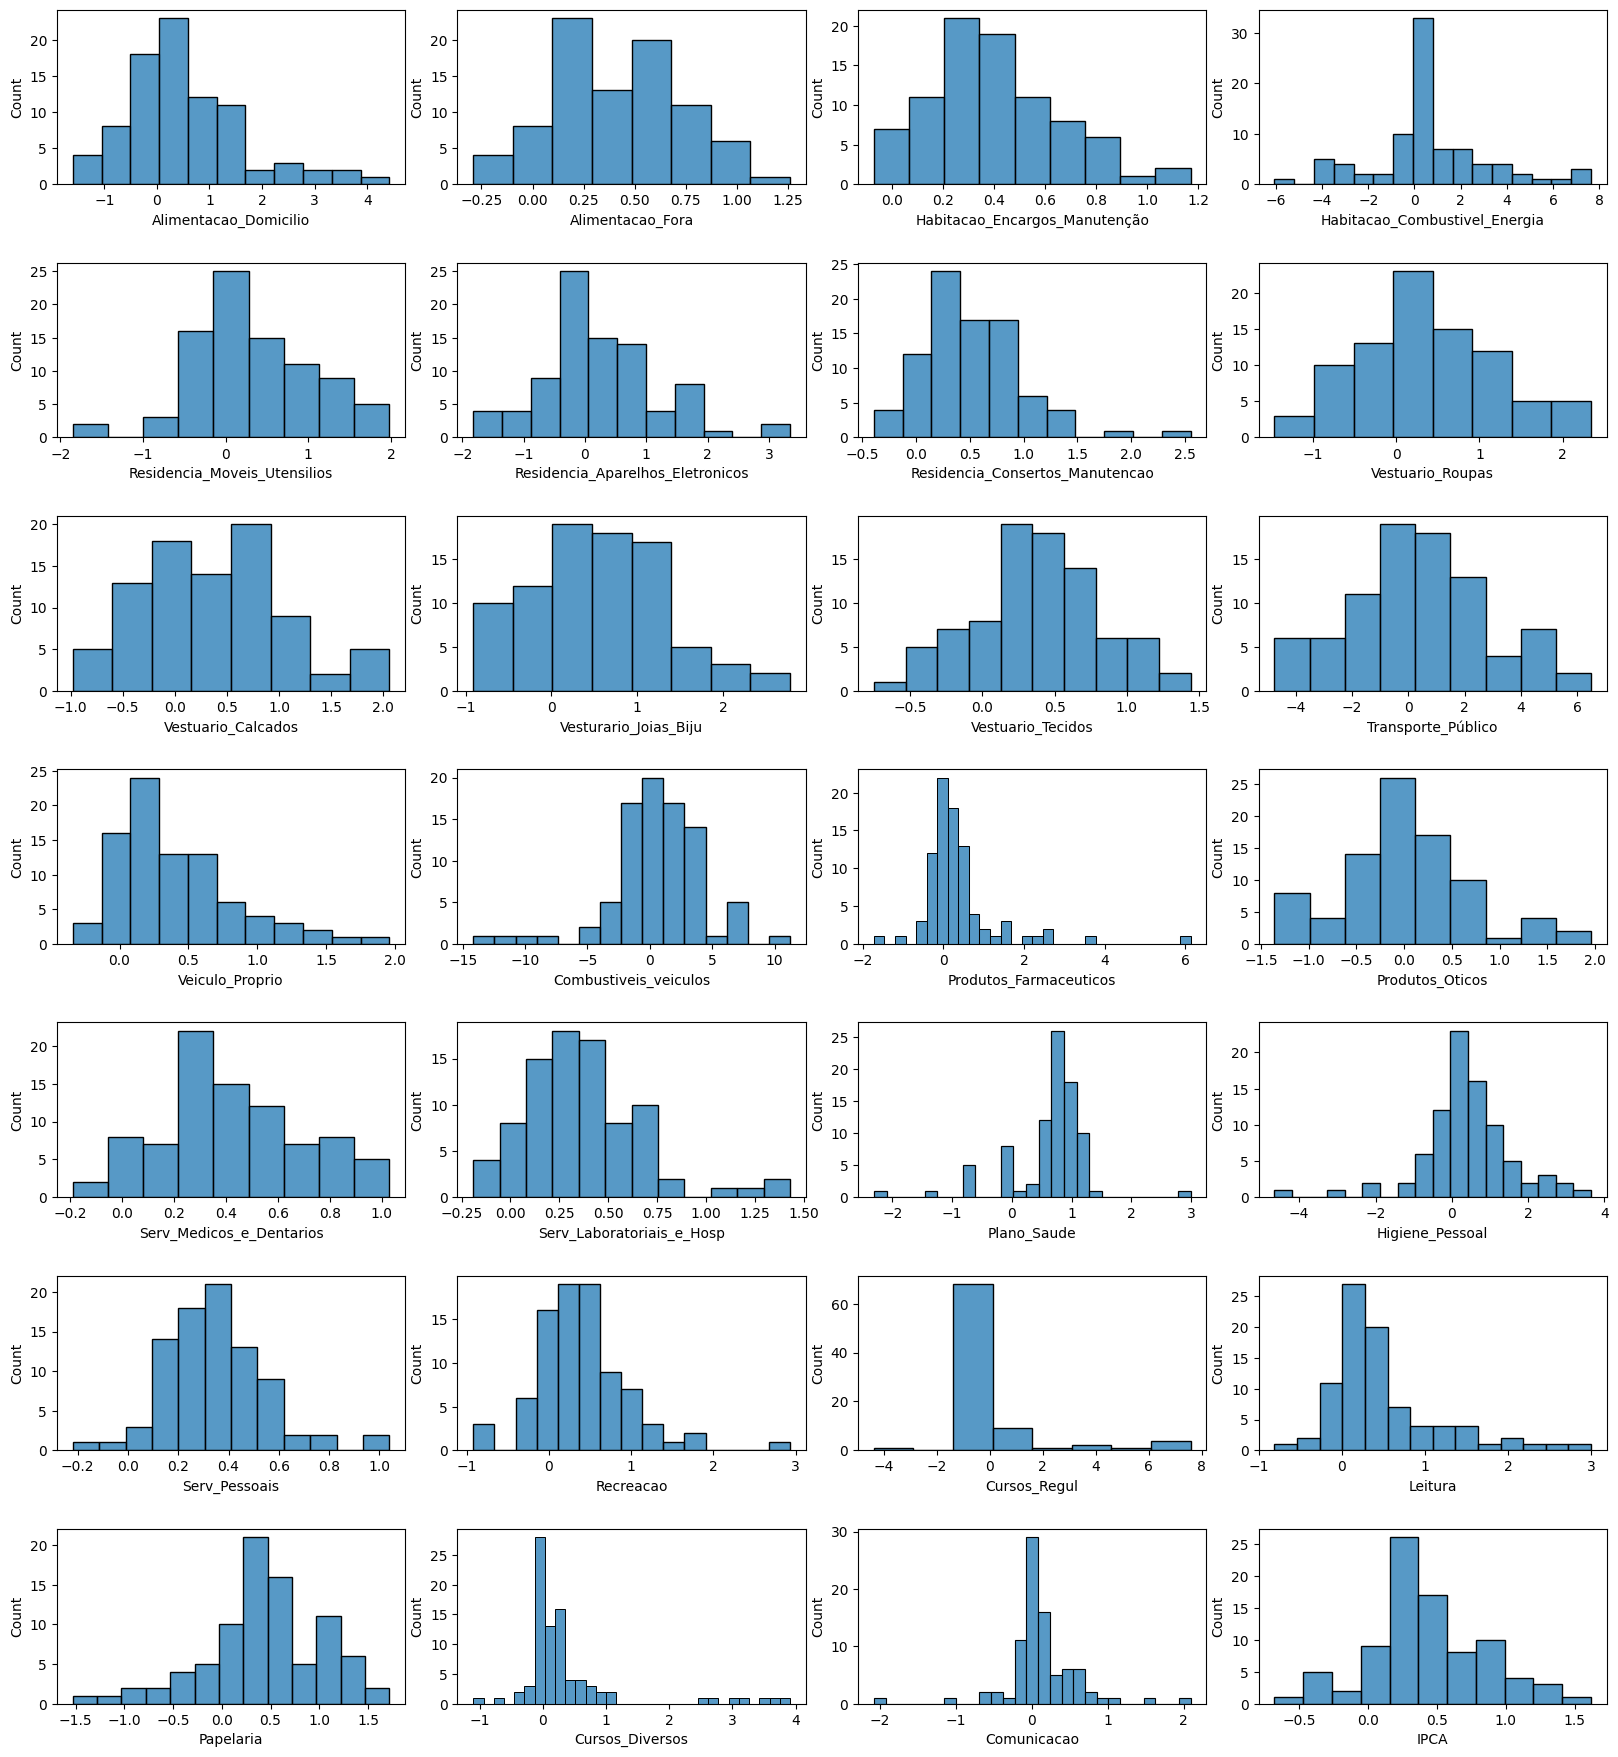

In [16]:
plt.rc('figure', figsize=(20, 22))
fig, axes = plt.subplots(7,4)

sns.histplot(ax = axes[0, 0], x='Alimentacao_Domicilio', data=df3)
sns.histplot(ax = axes[0, 1], x='Alimentacao_Fora', data=df3)
sns.histplot(ax = axes[0, 2], x='Habitacao_Encargos_Manutenção', data=df3)
sns.histplot(ax = axes[0, 3], x='Habitacao_Combustivel_Energia', data=df3)
sns.histplot(ax = axes[1, 0], x='Residencia_Moveis_Utensilios', data=df3)
sns.histplot(ax = axes[1, 1], x='Residencia_Aparelhos_Eletronicos', data=df3)
sns.histplot(ax = axes[1, 2], x='Residencia_Consertos_Manutencao', data=df3)
sns.histplot(ax = axes[1, 3], x='Vestuario_Roupas', data=df3)
sns.histplot(ax = axes[2, 0], x='Vestuario_Calcados', data=df3)
sns.histplot(ax = axes[2, 1], x='Vesturario_Joias_Biju', data=df3)
sns.histplot(ax = axes[2, 2], x='Vestuario_Tecidos', data=df3)
sns.histplot(ax = axes[2, 3], x='Transporte_Público', data=df3)
sns.histplot(ax = axes[3, 0], x='Veiculo_Proprio', data=df3)
sns.histplot(ax = axes[3, 1], x='Combustiveis_veiculos', data=df3)
sns.histplot(ax = axes[3, 2], x='Produtos_Farmaceuticos', data=df3)
sns.histplot(ax = axes[3, 3], x='Produtos_Oticos', data=df3)
sns.histplot(ax = axes[4, 0], x='Serv_Medicos_e_Dentarios', data=df3)
sns.histplot(ax = axes[4, 1], x='Serv_Laboratoriais_e_Hosp', data=df3)
sns.histplot(ax = axes[4, 2], x='Plano_Saude', data=df3)
sns.histplot(ax = axes[4, 3], x='Higiene_Pessoal', data=df3)
sns.histplot(ax = axes[5, 0], x='Serv_Pessoais', data=df3)
sns.histplot(ax = axes[5, 1], x='Recreacao', data=df3)
sns.histplot(ax = axes[5, 2], x='Cursos_Regul', data=df3)
sns.histplot(ax = axes[5, 3], x='Leitura', data=df3)
sns.histplot(ax = axes[6, 0], x='Papelaria', data=df3)
sns.histplot(ax = axes[6, 1], x='Cursos_Diversos', data=df3)
sns.histplot(ax = axes[6, 2], x='Comunicacao', data=df3)
sns.histplot(ax = axes[6, 3], x='IPCA', data=df3)

plt.subplots_adjust(wspace=0.15, hspace=0.45)

### **Entendimento dos Dados - Bivariada**

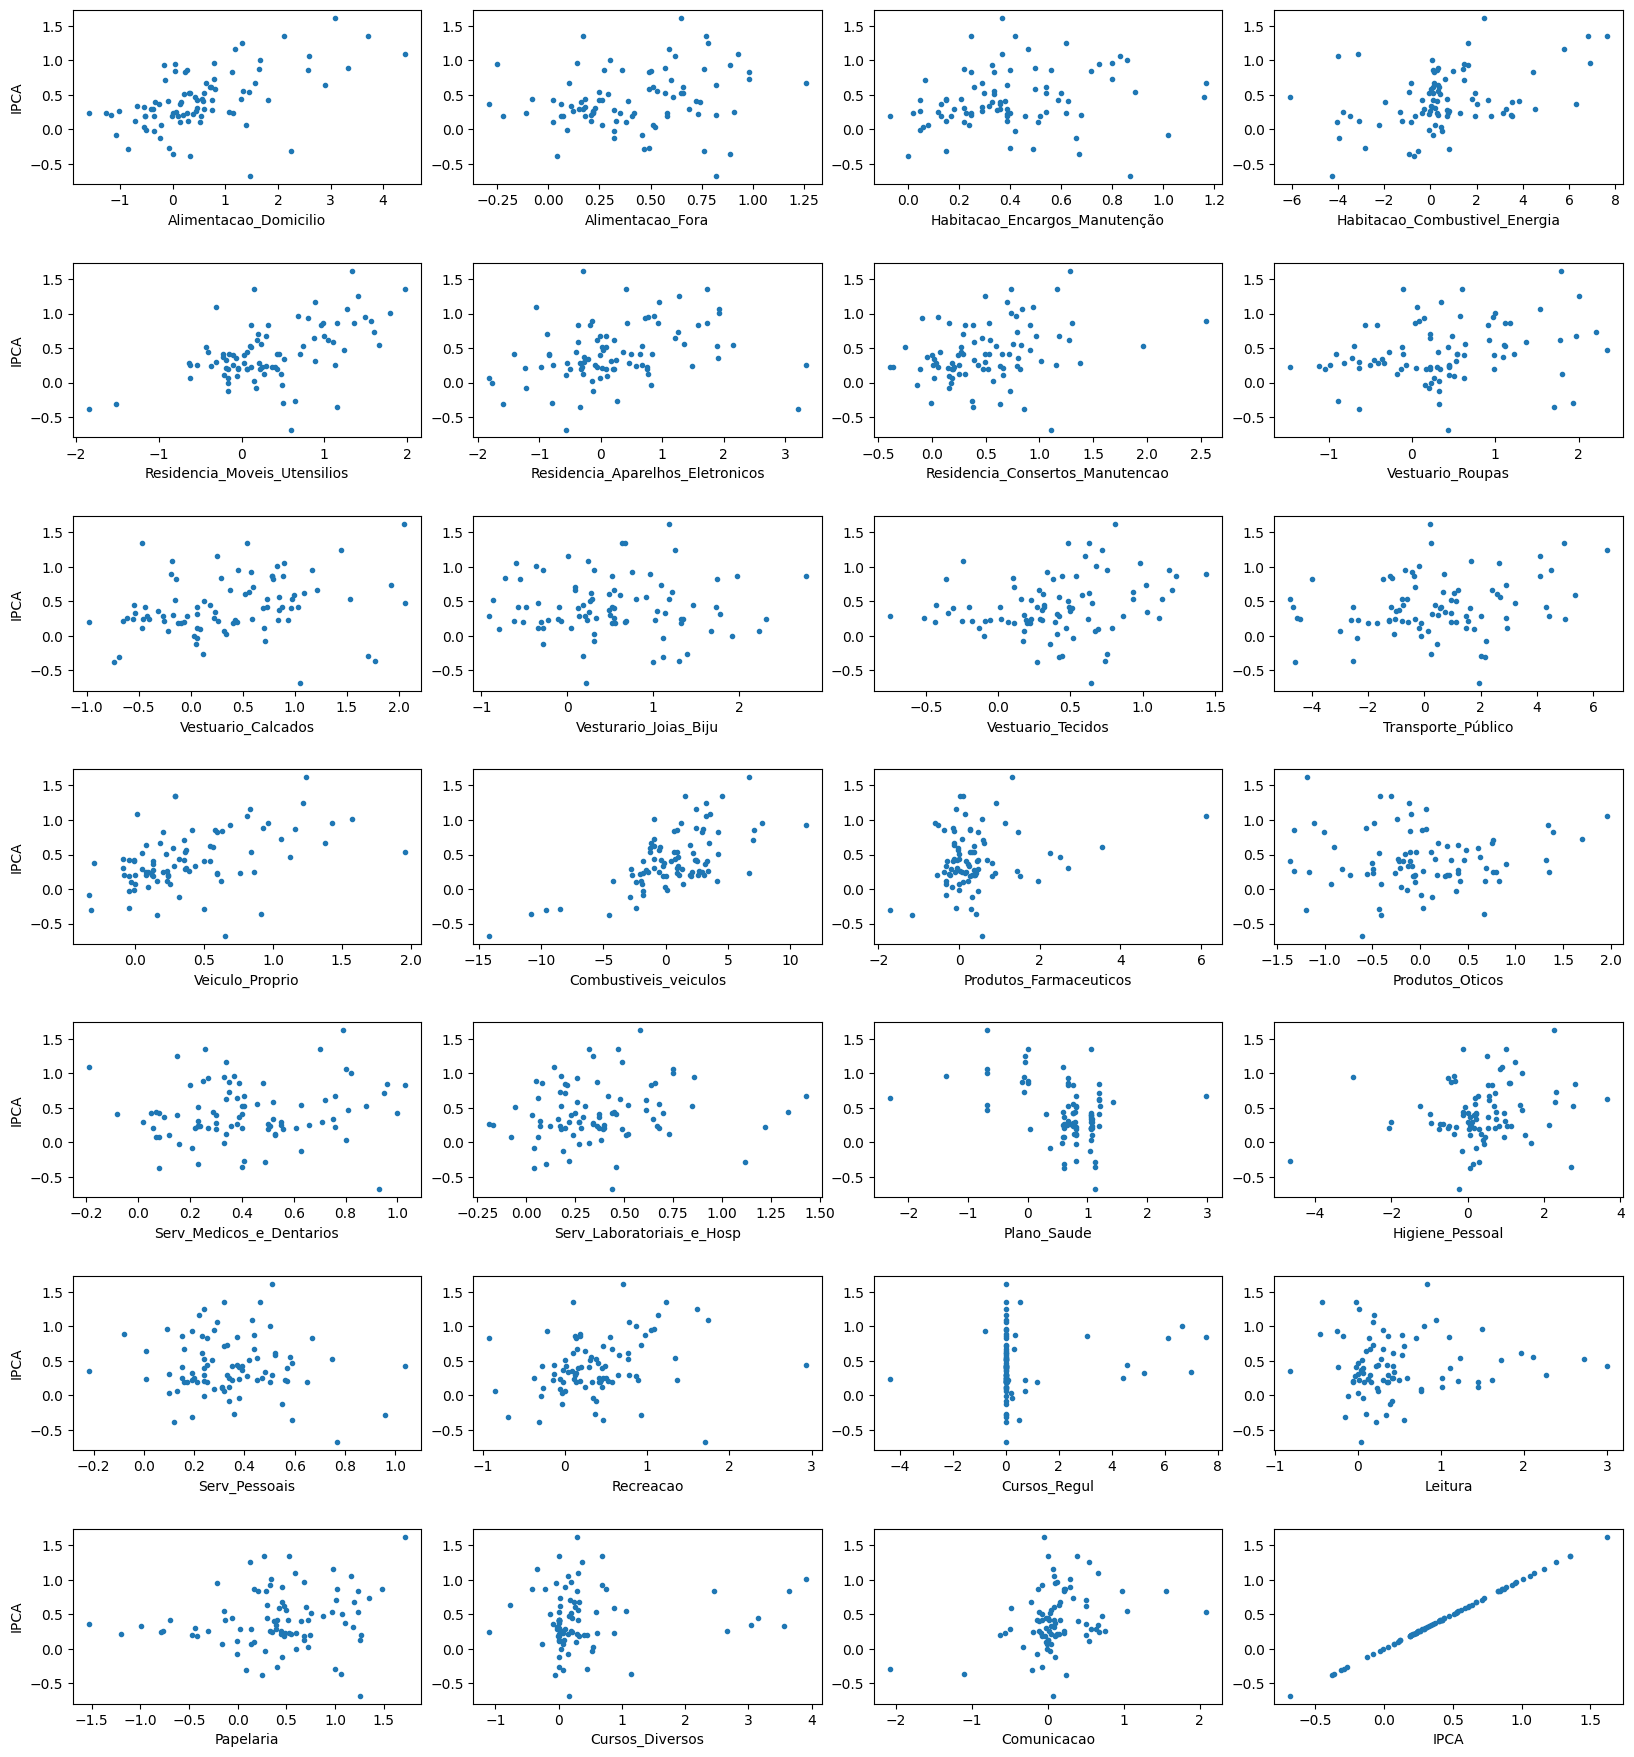

In [17]:
plt.rc('figure', figsize=(20, 22))
fig, axes = plt.subplots(7,4)

axes[0,0].plot(df3['Alimentacao_Domicilio'], df3['IPCA'], '.')
axes[0,1].plot(df3['Alimentacao_Fora'], df3['IPCA'], '.')
axes[0,2].plot(df3['Habitacao_Encargos_Manutenção'], df3['IPCA'], '.')
axes[0,3].plot(df3['Habitacao_Combustivel_Energia'], df3['IPCA'], '.')
axes[1,0].plot(df3['Residencia_Moveis_Utensilios'], df3['IPCA'], '.')
axes[1,1].plot(df3['Residencia_Aparelhos_Eletronicos'], df3['IPCA'], '.')
axes[1,2].plot(df3['Residencia_Consertos_Manutencao'], df3['IPCA'], '.')
axes[1,3].plot(df3['Vestuario_Roupas'], df3['IPCA'], '.')
axes[2,0].plot(df3['Vestuario_Calcados'], df3['IPCA'], '.')
axes[2,1].plot(df3['Vesturario_Joias_Biju'], df3['IPCA'], '.')
axes[2,2].plot(df3['Vestuario_Tecidos'], df3['IPCA'], '.')
axes[2,3].plot(df3['Transporte_Público'], df3['IPCA'], '.')
axes[3,0].plot(df3['Veiculo_Proprio'], df3['IPCA'], '.')
axes[3,1].plot(df3['Combustiveis_veiculos'], df3['IPCA'], '.')
axes[3,2].plot(df3['Produtos_Farmaceuticos'], df3['IPCA'], '.')
axes[3,3].plot(df3['Produtos_Oticos'], df3['IPCA'], '.')
axes[4,0].plot(df3['Serv_Medicos_e_Dentarios'], df3['IPCA'], '.')
axes[4,1].plot(df3['Serv_Laboratoriais_e_Hosp'], df3['IPCA'], '.')
axes[4,2].plot(df3['Plano_Saude'], df3['IPCA'], '.')
axes[4,3].plot(df3['Higiene_Pessoal'], df3['IPCA'], '.')
axes[5,0].plot(df3['Serv_Pessoais'], df3['IPCA'], '.')
axes[5,1].plot(df3['Recreacao'], df3['IPCA'], '.')
axes[5,2].plot(df3['Cursos_Regul'], df3['IPCA'], '.')
axes[5,3].plot(df3['Leitura'], df3['IPCA'], '.')
axes[6,0].plot(df3['Papelaria'], df3['IPCA'], '.')
axes[6,1].plot(df3['Cursos_Diversos'], df3['IPCA'], '.')
axes[6,2].plot(df3['Comunicacao'], df3['IPCA'], '.')
axes[6,3].plot(df3['IPCA'], df3['IPCA'], '.')


axes[0,0].set_xlabel('Alimentacao_Domicilio')
axes[0,0].set_ylabel('IPCA')
axes[0,1].set_xlabel('Alimentacao_Fora')
axes[0,2].set_xlabel('Habitacao_Encargos_Manutenção')
axes[0,3].set_xlabel('Habitacao_Combustivel_Energia')
axes[1,0].set_xlabel('Residencia_Moveis_Utensilios')
axes[1,0].set_ylabel('IPCA')
axes[1,1].set_xlabel('Residencia_Aparelhos_Eletronicos')
axes[1,2].set_xlabel('Residencia_Consertos_Manutencao')
axes[1,3].set_xlabel('Vestuario_Roupas')
axes[2,0].set_xlabel('Vestuario_Calcados')
axes[2,0].set_ylabel('IPCA')
axes[2,1].set_xlabel('Vesturario_Joias_Biju')
axes[2,2].set_xlabel('Vestuario_Tecidos')
axes[2,3].set_xlabel('Transporte_Público')
axes[3,0].set_xlabel('Veiculo_Proprio')
axes[3,0].set_ylabel('IPCA')
axes[3,1].set_xlabel('Combustiveis_veiculos')
axes[3,2].set_xlabel('Produtos_Farmaceuticos')
axes[3,3].set_xlabel('Produtos_Oticos')
axes[4,0].set_xlabel('Serv_Medicos_e_Dentarios')
axes[4,0].set_ylabel('IPCA')
axes[4,1].set_xlabel('Serv_Laboratoriais_e_Hosp')
axes[4,2].set_xlabel('Plano_Saude')
axes[4,3].set_xlabel('Higiene_Pessoal')
axes[5,0].set_xlabel('Serv_Pessoais')
axes[5,0].set_ylabel('IPCA')
axes[5,1].set_xlabel('Recreacao')
axes[5,2].set_xlabel('Cursos_Regul')
axes[5,3].set_xlabel('Leitura')
axes[6,0].set_xlabel('Papelaria')
axes[6,0].set_ylabel('IPCA')
axes[6,1].set_xlabel('Cursos_Diversos')
axes[6,2].set_xlabel('Comunicacao')
axes[6,3].set_xlabel('IPCA')

plt.subplots_adjust(wspace=0.15, hspace=0.45)

### **Tratamento de Outoliers**

> Considerando que todas as variáveis são taxas de inflação em determinados setores ou grupos, o que lhes atriubuiem a característica de variáveis quantitativas contínuas, entendemos que não há outliers a serem tratadas. Ademias, a maiore variação de valores se encontram na variável ***Habitação - Combustível e eneuergia***, cujos valores encontram-se entre -6 a 8.

## **IV - Da Modelagem de Previsão de Inflação pelo IPCA**

### **Da Divisão do Dataset em Base de treino e Base de Teste, na proporção de 75% e 25%, respectivamente** 

In [18]:
df4 = df3.drop(columns=['Competencia'])
X = df4.loc[:, 'Alimentacao_Domicilio':'Comunicacao']
y = df4[['IPCA']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, train_size = 0.75, random_state=1000)


In [19]:
X_train.shape

(64, 27)

In [20]:
y_train.shape

(64, 1)

In [21]:
X_test.shape

(22, 27)

In [22]:
y_test.shape

(22, 1)

> Considerando que o Dataset possui somente 86 linhas. Dividimos o dataset somente em Treino e Teste, até para se manter um numero de linhas consideráveis para a aprendizagem da inteligência artifical do modelo preditivo. Enfim não adotamos o uma base de fora do treino e treste (Out of Time - OOT)

### **Rodando Modelo pelo Metodo RandomFlorestRegressor**

In [23]:
clf = RandomForestRegressor(n_estimators=10)
clf.fit(X_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=10)

> Utilizamos RandomFlorestREgressor porque a saída desejada (o pedicto) seria um valor quantitativo continuo ou discrito. Caso a intenção fosse classificar em alguma categoria poderia utilizar o RandomFlorestClassifier

In [39]:
y_pred = clf.predict(X_test)


In [91]:
df_acertos = y_test.copy()
df_acertos['IPCA_preditado'] = y_pred
df_acertos['Diferença'] = df_acertos.IPCA - df_acertos.IPCA_preditado
df_acertos.loc[(df_acertos['Diferença']<=0.05) & (df_acertos['Diferença']>= -0.05), 'Acerto']= 1
df_acertos = df_acertos.fillna(0)
df_acertos

,IPCA,IPCA_preditado,Diferença,Acerto
4,0.37,0.252,0.118,0.0
34,0.44,0.280,0.160,0.0
33,0.07,0.282,-0.212,0.0
57,1.25,0.916,0.334,0.0
85,0.83,0.395,0.435,0.0
83,0.56,0.392,0.168,0.0
54,0.96,0.394,0.566,0.0
44,0.64,0.882,-0.242,0.0
72,0.53,0.559,-0.029,1.0
79,0.23,0.212,0.018,1.0


In [92]:
df_acuracia = pd.DataFrame(df_acertos.Acerto.value_counts())
df_acuracia= df_acuracia.reset_index(drop=False)
df_acuracia

,Acerto,count
0,0.0,18
1,1.0,4


In [93]:
Acuracia = df_acuracia.iloc[1,1]/(df_acuracia.iloc[0,1]+df_acuracia.iloc[1,1]) 
Acuracia

0.18181818181818182

> Acuária de 0,1818% de acerto, com margem de erro de 0.05 pontos percentuais.


### **Rodando Modelo Statsmodels**

In [96]:
df5 = pd.concat([X_train, y_train], axis=1)


In [97]:
results = smf.ols('''IPCA ~ Alimentacao_Domicilio +
                  Alimentacao_Fora + 
                  Habitacao_Encargos_Manutenção +
                  Habitacao_Combustivel_Energia +
                  Residencia_Moveis_Utensilios +
                  Residencia_Aparelhos_Eletronicos +
                  Residencia_Consertos_Manutencao + 
                  Vestuario_Roupas +
                  Vestuario_Calcados + 
                  Vesturario_Joias_Biju + 
                  Vestuario_Tecidos +
                  Transporte_Público + 
                  Veiculo_Proprio + 
                  Combustiveis_veiculos +
                  Serv_Laboratoriais_e_Hosp +
                  Plano_Saude +
                  Higiene_Pessoal +
                  Serv_Pessoais +
                  Recreacao +
                  Cursos_Regul +
                  Leitura +
                  Papelaria +
                  Cursos_Diversos +
                  Comunicacao''', 
                  data=df5).fit()


In [100]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IPCA   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     160.6
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           6.33e-32
Time:                        15:56:46   Log-Likelihood:                 111.41
No. Observations:                  64   AIC:                            -172.8
Df Residuals:                      39   BIC:                            -118.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.0762      0.033      2.342      0.024       0.010       0.142
Alimentacao_Domicilio                0.1567      0.011     14.910      0.000       0.135       0.178
Alimentacao_Fora                     0.0821      0.028      2.907      0.006       0.025       0.139
Habitacao_Encargos_Manutenção        0.0967      0.038      2.557      0.015       0.020       0.173
Habitacao_Combustivel_Energia        0.0542      0.004     13.108      0.000       0.046       0.063
Residencia_Moveis_Utensilios         0.0345      0.022      1.586      0.121      -0.009       0.079
Residencia_Aparelhos_Eletronicos     0.0246      0.011      2.273      0.029       0.003       0.046
Residencia_Consertos_Manutencao     -0.0168      0.026     -0.656      0.515      -0.069       0.035
Vestuario_Roupas                     0.0543      0.020      2.745      0.009       0.014       0.094
Vestuario_Calcados                   0.0018      0.026      0.071      0.944      -0.051       0.055
Vesturario_Joias_Biju               -0.0200      0.011     -1.792      0.081      -0.043       0.003
Vestuario_Tecidos                   -0.0325      0.027     -1.200      0.238      -0.087       0.022
Transporte_Público                   0.0311      0.004      7.536      0.000       0.023       0.039
Veiculo_Proprio                      0.1430      0.032      4.411      0.000       0.077       0.209
Combustiveis_veiculos                0.0664      0.002     27.153      0.000       0.061       0.071
Serv_Laboratoriais_e_Hosp           -0.0101      0.033     -0.303      0.764      -0.078       0.057
Plano_Saude                          0.0105      0.015      0.691      0.494      -0.020       0.041
Higiene_Pessoal                      0.0442      0.008      5.442      0.000       0.028       0.061
Serv_Pessoais                       -0.0193      0.050     -0.383      0.704      -0.121       0.083
Recreacao                            0.0197      0.029      0.677      0.502      -0.039       0.079
Cursos_Regul                         0.0676      0.013      5.169      0.000       0.041       0.094
Leitura                              0.0350      0.015      2.275      0.028       0.004       0.066
Papelaria                           -0.0194      0.017     -1.128      0.266      -0.054       0.015
Cursos_Diversos                     -0.0592      0.027     -2.205      0.033      -0.113      -0.005
Comunicacao                          0.0123      0.024      0.511      0.612      -0.036       0.061
==============================================================================
Omnibus:                        3.307   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.674
Skew:             

In [101]:
results.rsquared

0.9899842275261586

In [102]:
results.predict()

array([-0.58707536,  0.30900294,  0.40665951,  0.3329585 ,  0.2010054 ,
        1.34270528,  0.15314247,  0.25010748, -0.28281781,  0.1688666 ,
        1.19725956,  0.95929453,  0.7933463 ,  0.08470945,  1.54029049,
        1.37970029,  0.16862893,  0.88846474,  0.51611789,  0.72416023,
        0.26490164,  0.32520917,  0.64901221,  0.20508277,  0.29163642,
        0.24091199, -0.35380429,  0.12724193,  0.44550955,  0.28820805,
       -0.06113088,  0.66796683,  0.46888116,  0.96928843,  0.80967601,
       -0.01644555,  0.17499237,  0.77400418,  0.38351564,  0.20972856,
       -0.22702314,  0.24827972,  0.01955475, -0.31857182,  0.23886406,
        0.54854589,  0.44826715,  0.190508  ,  0.4040145 ,  0.21340136,
        0.55903987,  0.25272784,  0.89327734,  0.3914108 ,  0.57557844,
        0.22184464, -0.38557959,  0.93975061,  0.26573428,  1.04228346,
        0.34980819,  0.47759777,  0.65419971,  0.22557254])

In [136]:
df_acertos = pd.DataFrame(df5['IPCA'].copy())
df_acertos['IPCA_preditado'] = results.predict()
df_acertos['IPCA_preditado'] = df_acertos['IPCA_preditado'].round(2)
df_acertos['Diferença'] = df_acertos.IPCA - df_acertos.IPCA_preditado
df_acertos.loc[(df_acertos['Diferença']==0.00), 'Acerto']= 1
df_acertos = df_acertos.fillna(0)
df_acertos

,IPCA,IPCA_preditado,Diferença,Acerto
66,-0.68,-0.59,-0.09,0.0
6,0.30,0.31,-0.01,0.0
9,0.40,0.41,-0.01,0.0
13,0.33,0.33,0.00,1.0
2,0.20,0.20,0.00,1.0
...,...,...,...,...
61,1.01,1.04,-0.03,0.0
1,0.34,0.35,-0.01,0.0
64,0.47,0.48,-0.01,0.0
71,0.62,0.65,-0.03,0.0


In [137]:
df_acuracia = pd.DataFrame(df_acertos.Acerto.value_counts())
df_acuracia= df_acuracia.reset_index(drop=False)
df_acuracia

,Acerto,count
0,0.0,58
1,1.0,6


In [138]:
Acuracia = df_acuracia.iloc[0,1]/(df_acuracia.iloc[0,1]+df_acuracia.iloc[1,1]) 
Acuracia

0.90625

Na Base de Treino, a acurácia pelo statsmodels foi de 0,98. Diferença deste valor com o cálculo acima (resultado de 0.90625) pode ser em razão do arredondamento.

In [140]:
df5_test = pd.concat([X_test, y_test], axis=1)

In [141]:
results = smf.ols('''IPCA ~ Alimentacao_Domicilio +
                  Alimentacao_Fora + 
                  Habitacao_Encargos_Manutenção +
                  Habitacao_Combustivel_Energia +
                  Residencia_Moveis_Utensilios +
                  Residencia_Aparelhos_Eletronicos +
                  Residencia_Consertos_Manutencao + 
                  Vestuario_Roupas +
                  Vestuario_Calcados + 
                  Vesturario_Joias_Biju + 
                  Vestuario_Tecidos +
                  Transporte_Público + 
                  Veiculo_Proprio + 
                  Combustiveis_veiculos +
                  Serv_Laboratoriais_e_Hosp +
                  Plano_Saude +
                  Higiene_Pessoal +
                  Serv_Pessoais +
                  Recreacao +
                  Cursos_Regul +
                  Leitura +
                  Papelaria +
                  Cursos_Diversos +
                  Comunicacao''', 
                  data=df5_test).fit()


In [142]:
results.rsquared

1.0

In [143]:
results.predict()

array([ 0.37,  0.44,  0.07,  1.25,  0.83,  0.56,  0.96,  0.64,  0.53,
        0.23,  0.53,  0.87,  0.44,  0.25,  0.25,  1.09,  0.89,  0.61,
        0.07, -0.03,  0.11, -0.27])

In [144]:
df_acertos = pd.DataFrame(df5_test['IPCA'].copy())
df_acertos['IPCA_preditado'] = results.predict()
df_acertos['IPCA_preditado'] = df_acertos['IPCA_preditado'].round(2)
df_acertos['Diferença'] = df_acertos.IPCA - df_acertos.IPCA_preditado
df_acertos.loc[(df_acertos['Diferença']==0.00), 'Acerto']= 1
df_acertos = df_acertos.fillna(0)
df_acertos

,IPCA,IPCA_preditado,Diferença,Acerto
4,0.37,0.37,0.0,1.0
34,0.44,0.44,0.0,1.0
33,0.07,0.07,0.0,1.0
57,1.25,1.25,0.0,1.0
85,0.83,0.83,0.0,1.0
83,0.56,0.56,0.0,1.0
54,0.96,0.96,0.0,1.0
44,0.64,0.64,0.0,1.0
72,0.53,0.53,0.0,1.0
79,0.23,0.23,0.0,1.0


As variáveis irrelevantes são aquelas com P>|t| maiores de 0,5, ou seja, são irrelevantes as variáveis:

* Residencia_Consertos_Manutencao;
* Vestuario_Calcados;
* Serv_Laboratoriais_e_Hosp;
* Serv_Pessoais;
* Recreacao;
* Comunicacao

In [145]:
results = smf.ols('''IPCA ~ Alimentacao_Domicilio +
                  Alimentacao_Fora + 
                  Habitacao_Encargos_Manutenção +
                  Habitacao_Combustivel_Energia +
                  Residencia_Moveis_Utensilios +
                  Residencia_Aparelhos_Eletronicos +
                  Vestuario_Roupas +
                  Vesturario_Joias_Biju + 
                  Vestuario_Tecidos +
                  Transporte_Público + 
                  Veiculo_Proprio + 
                  Combustiveis_veiculos +
                  Plano_Saude +
                  Higiene_Pessoal +
                  Serv_Pessoais +
                  Cursos_Regul +
                  Leitura +
                  Papelaria +
                  Cursos_Diversos''', 
                  data=df5).fit()


In [146]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IPCA   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     220.2
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           2.43e-37
Time:                        16:43:36   Log-Likelihood:                 110.18
No. Observations:                  64   AIC:                            -180.4
Df Residuals:                      44   BIC:                            -137.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.0694      0.024      2.868      0.006       0.021       0.118
Alimentacao_Domicilio                0.1523      0.008     18.547      0.000       0.136       0.169
Alimentacao_Fora                     0.0854      0.027      3.194      0.003       0.032       0.139
Habitacao_Encargos_Manutenção        0.1044      0.035      3.002      0.004       0.034       0.174
Habitacao_Combustivel_Energia        0.0554      0.004     15.494      0.000       0.048       0.063
Residencia_Moveis_Utensilios         0.0396      0.018      2.192      0.034       0.003       0.076
Residencia_Aparelhos_Eletronicos     0.0227      0.010      2.386      0.021       0.004       0.042
Vestuario_Roupas                     0.0472      0.014      3.491      0.001       0.020       0.074
Vesturario_Joias_Biju               -0.0229      0.010     -2.333      0.024      -0.043      -0.003
Vestuario_Tecidos                   -0.0319      0.024     -1.328      0.191      -0.080       0.017
Transporte_Público                   0.0316      0.004      8.703      0.000       0.024       0.039
Veiculo_Proprio                      0.1561      0.026      5.913      0.000       0.103       0.209
Combustiveis_veiculos                0.0660      0.002     34.791      0.000       0.062       0.070
Plano_Saude                          0.0075      0.014      0.532      0.597      -0.021       0.036
Higiene_Pessoal                      0.0462      0.007      6.376      0.000       0.032       0.061
Serv_Pessoais                       -0.0260      0.042     -0.616      0.541      -0.111       0.059
Cursos_Regul                         0.0682      0.012      5.885      0.000       0.045       0.092
Leitura                              0.0407      0.013      3.220      0.002       0.015       0.066
Papelaria                           -0.0207      0.015     -1.369      0.178      -0.051       0.010
Cursos_Diversos                     -0.0628      0.024     -2.648      0.011      -0.111      -0.015
==============================================================================
Omnibus:                        3.629   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.386
Skew:                           0.560   Prob(JB):                        0.184
Kurtosis:                       2.870   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
results.rsquared

0.9895913054043379

Reduzimos a quantidade de variáveis explicativas de 25  para 19 variáveis (feactures)

In [148]:
results = smf.ols('''IPCA ~ Alimentacao_Domicilio +
                  Alimentacao_Fora + 
                  Habitacao_Encargos_Manutenção +
                  Habitacao_Combustivel_Energia +
                  Residencia_Moveis_Utensilios +
                  Residencia_Aparelhos_Eletronicos +
                  Vestuario_Roupas +
                  Vesturario_Joias_Biju + 
                  Vestuario_Tecidos +
                  Transporte_Público + 
                  Veiculo_Proprio + 
                  Combustiveis_veiculos +
                  Plano_Saude +
                  Higiene_Pessoal +
                  Serv_Pessoais +
                  Cursos_Regul +
                  Leitura +
                  Papelaria +
                  Cursos_Diversos''', 
                  data=df5_test).fit()

In [150]:
results.rsquared

0.9945064018740306

Melhoras o modelo, visto que não houve uma alteração significativa da acurácia, mesmo com redução de 5 variáveis (irrelevantes)

## **V - Conclusão** 

Verificamos que o melhor modelo preditivo foi com a utilização do Statsmodels Formula (OLS - Ordinary Least Squares
), em relação ao RandomFlorestRegressor. Ademais, verificamos que as variáveis mais irrelevantes foram:

* Residencia_Consertos_Manutencao;
* Vestuario_Calcados;
* Serv_Laboratoriais_e_Hosp;
* Serv_Pessoais;
* Recreacao;
* Comunicacao

Estas variáveis foram excluídas do modelo final.

Cabe esclarecer que este modelos ainda pode ser melhorado, no sentido de se buscar o melhor preditivo com menor números de variáveis, desta forma poderá obter insight em relação ao grupo que mais impacta na taxa IPCA. 

Enfim, trata-se de um trabalho inicial, sem pretensão de exaurir o estudo, haja visto que este projeto poderá ser ainda desenvolvido com a inclusão de mais competências (mes/ano) no Dataset e novos insights a serem buscados.